# 서포트 벡터 머신

* 선형, 비선형 분류, 회귀, 이상치 담색에도 사요할 수 있는 다목적 머신러닝 모델
* 복잡한 분류문제에 잘 들어 맞으며 작거나 중간 크기의 데이터셋에 적합

## 5.1 선형 SVM 분류

* svm 분류기는 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다.
* large margin classification이라고도 한다
* 특성 scale에 민감함

### 5.1.1 소프트 마진 분류

* `모든` 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 하드 마진 분류라고 함
* 소프트 마진 분류란 도로의 폭을 가능한 넓게 유지하는 것과 마진오류(샘플 오분류) 사이에 적절한 균형을 잡아야한다
* `C`(hyper parameter) : 오류를 얼마나 허용할 것인가를 다룬다, 높을수록 오류를 허용하지않고 낮을수록 오류를 허용함
    * 모델이 과적합되면 C값을 낮춰 모델을 규제할 수 있다

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

svm_clf.fit(X, y)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

# 각 클래스에 대한 확률은 없다

array([1.])

## 5.2 비선형 SVM 분류

* 선형 분류가 안될경우 특성에 변화를 주어서 분류하는 방법도 있다
* ex) $x1 -> (x1)^2$

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polyonmial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polyonmial_svm_clf.fit(X,y)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [30]:
def make_meshgrid(x, y, h = 0.01):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

In [31]:
import matplotlib.pyplot as plt

def plot_contours(model, xx, yy, **params):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params) 

  return out

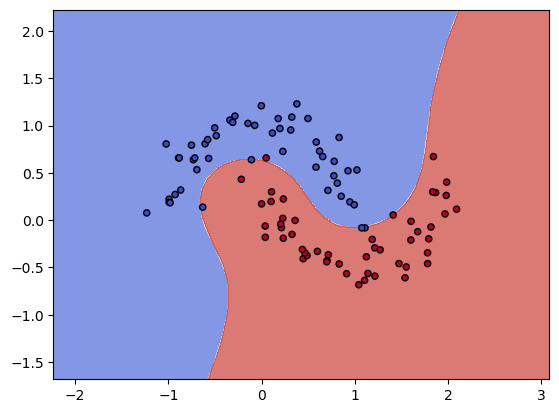

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X_comp = TSNE(n_components=2).fit_transform(X) 3차원 이상일경우 사용
X_comp = X
X0, X1 = X_comp[:,0], X_comp[:,1]

xx0, xx1 = make_meshgrid(X0, X1)

model = polyonmial_svm_clf
plot_contours(model, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.show()

### 5.2.1 다항식 커널

* svm을 사용할 때는 커널 트릭을 사용하여 다항 특성을 추가 할 수 있음
* 실제로 특성을 추가하는건 아니지만 특성을 추가한 것과 같은 결과를 얻을 수 있다

In [13]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)) #3차 다항식 커널
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

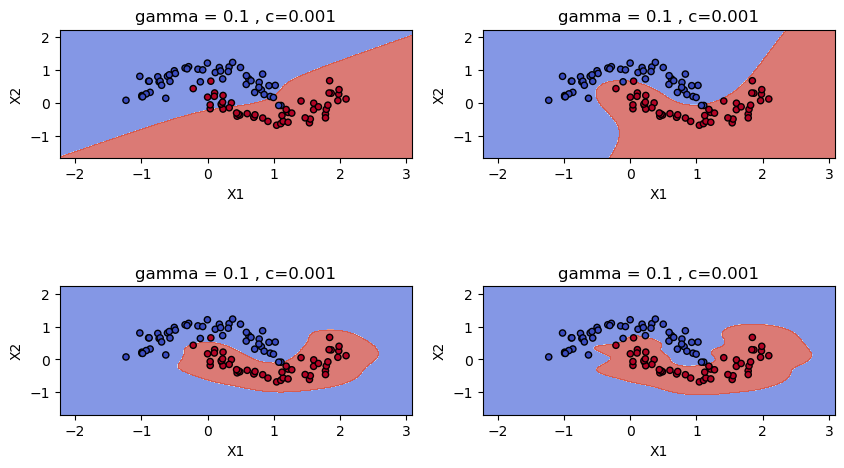

In [54]:
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', gamma=0.1, C=0.001)) 
])
model1.fit(X,y)

model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=1000)) 
])
model2.fit(X,y)

model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)) 
])
model3.fit(X,y)

model4 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=1000)) 
])
model4.fit(X,y)


plt.figure(figsize = (10, 5))
plt.subplot(2,2,1)
plt.title('gamma = 0.1 , c=0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plot_contours(model1, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

plt.subplot(2,2,2)
plt.title('gamma = 0.1 , c=0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plot_contours(model2, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

plt.subplot(2,2,3)
plt.title('gamma = 0.1 , c=0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plot_contours(model3, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

plt.subplot(2,2,4)
plt.title('gamma = 0.1 , c=0.001')
plt.xlabel('X1')
plt.ylabel('X2')
plot_contours(model4, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

plt.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

### 5.2.2 유사도 특성

pass

### 5.2.3 가우시안 RBF 커널